<a href="https://colab.research.google.com/github/Madhumitha0306/Machine_Learning_Task/blob/main/Restaurant_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TO PREDICT RESTAURANT RATINGS**

In [63]:
 # Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files


In [2]:
# load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Dataset .xlsx")
print("Dataset Loaded Successfully!\n")


Saving Dataset .xlsx to Dataset .xlsx
Dataset Loaded Successfully!



In [3]:
#  Basic dataset information
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
df.head()
df.info()
df.describe(include='all').T


Shape of dataset: (9551, 21)

Column names: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float6

count unique                         top  freq  \
Restaurant ID         9551.0    NaN                         NaN   NaN   
Restaurant Name         9551   7446             Cafe Coffee Day    83   
Country Code          9551.0    NaN                         NaN   NaN   
City                    9551    141                   New Delhi  5473   
Address                 9551   8918            Sector 41, Noida    11   
Locality                9551   1208             Connaught Place   122   
Locality Verbose        9551   1265  Connaught Place, New Delhi   122   
Longitude             9551.0    NaN                         NaN   NaN   
Latitude              9551.0    NaN                         NaN   NaN   
Cuisines                9542   1825                North Indian   936   
Average Cost for two  9551.0    NaN                         NaN   NaN   
Currency                9551     12          Indian Rupees(Rs.)  8652   
Has Table booking       9551      2                          No  8393   
Has Online delivery     9551      2                          No  7100   
Is delivering now       9551      2                          No  9517   
Switch to order menu    9551      1                          No  9551   
Price range           9551.0    NaN                         NaN   NaN   
Aggregate rating      9551.0    NaN                         NaN   NaN   
Rating color            9551      6                      Orange  3737   
Rating text             9551      6                     Average  3737   
Votes                 9551.0    NaN                         NaN   NaN   

                                mean             std         min        25%  \
Restaurant ID         9051128.349178  8791521.282104        53.0   301962.5   
Restaurant Name                  NaN             NaN         NaN        NaN   
Country Code               18.365616       56.750546         1.0        1.0   
City                             NaN             NaN         NaN        NaN   
Address                          NaN             NaN         NaN        NaN   
Locality                         NaN             NaN         NaN        NaN   
Locality Verbose                 NaN             NaN         NaN        NaN   
Longitude                  64.126574       41.467058 -157.948486  77.081343   
Latitude                   25.854381       11.007935  -41.330428  28.478713   
Cuisines                         NaN             NaN         NaN        NaN   
Average Cost for two     1199.210763    16121.183073         0.0      250.0   
Currency                         NaN             NaN         NaN        NaN   
Has Table booking                NaN             NaN         NaN        NaN   
Has Online delivery              NaN             NaN         NaN        NaN   
Is delivering now                NaN             NaN         NaN        NaN   
Switch to order menu             NaN             NaN         NaN        NaN   
Price range                 1.804837        0.905609         1.0        1.0   
Aggregate rating             2.66637        1.516378         0.0        2.5   
Rating color                     NaN             NaN         NaN        NaN   
Rating text                      NaN             NaN         NaN        NaN   
Votes                     156.909748      430.169145         0.0        5.0   

                            50%         75%         max  
Restaurant ID         6004089.0  18352291.5  18500652.0  
Restaurant Name             NaN         NaN         NaN  
Country Code                1.0         1.0       216.0  
City                        NaN         NaN         NaN  
Address                     NaN         NaN         NaN  
Locality                    NaN         NaN         NaN  
Locality Verbose            NaN         NaN         NaN  
Longitude             77.191964   77.282006  174.832089  
Latitude              28.570469   28.642758    55.97698  
Cuisines                    NaN         NaN         NaN  
Average Cost for two      400.0       7

In [4]:
#  Handle missing values
print("Missing values per column:\n", df.isnull().sum())

# Fill numeric NaN with median, categorical NaN with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


Missing values per column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
#  Encode categorical columns safely (fix mixed-type issue)
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    # Convert all entries to string to ensure uniform type
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

print("Categorical columns encoded successfully!")


Categorical columns encoded successfully!


In [6]:
#  Separate features and target variable
target = 'Aggregate rating'  # update if named differently
X = df.drop(columns=[target])
y = df[target]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (9551, 20)
Target shape: (9551,)


In [7]:
#  Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (7640, 20)
Testing set size: (1911, 20)


In [8]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
#  Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

#  Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [10]:
#  Evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")



Linear Regression Performance:
R² Score: 0.4646
RMSE: 1.1039

Decision Tree Regressor Performance:
R² Score: 0.9749
RMSE: 0.2393


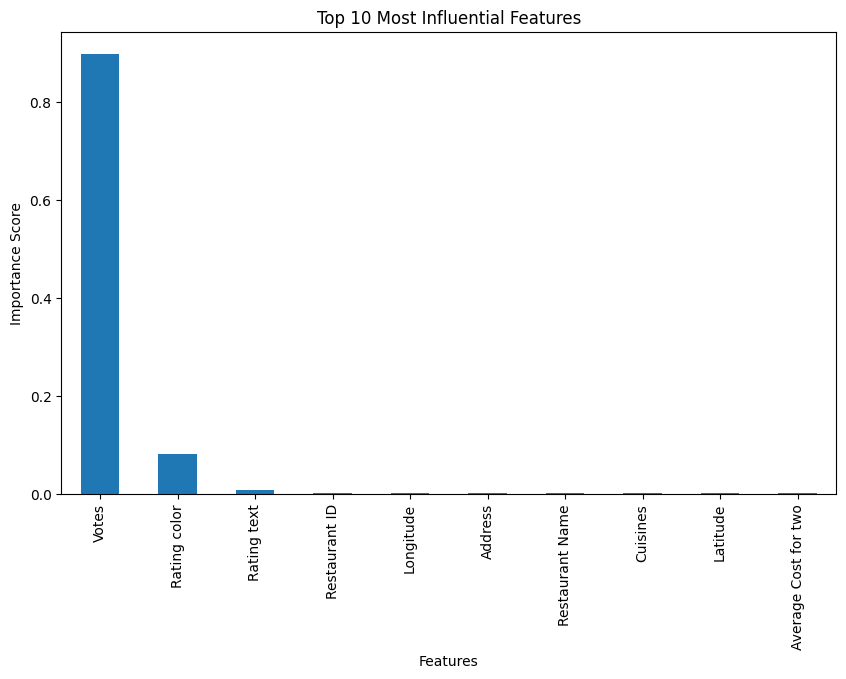

In [14]:
#  Feature Importance
importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar')
plt.title('Top 10 Most Influential Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


**RESTAURANT RECOMMENDATION**

In [15]:
from sklearn.metrics.pairwise import cosine_similarity


In [16]:
#  Select relevant features for similarity calculation
# (update column names if they differ in your dataset)
features = ['Cuisines', 'Average Cost for two', 'Price range', 'Aggregate rating']

# Create a new DataFrame for recommendation features
rec_df = df[features].copy()
rec_df.head()


Cuisines  Average Cost for two  Price range  Aggregate rating
0       920                  1100            3               4.8
1      1111                  1200            3               4.5
2      1671                  4000            4               4.4
3      1126                  1500            4               4.9
4      1122                  1500            4               4.8

In [17]:
# Normalize feature values
scaler = StandardScaler()
rec_scaled = scaler.fit_transform(rec_df)

# Compute similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(rec_scaled)
similarity_matrix.shape


(9551, 9551)

In [18]:
# Define the recommendation function
def recommend_restaurants(index, n_recommendations=5):
    # Get similarity scores for the given restaurant
    scores = list(enumerate(similarity_matrix[index]))
    # Sort by similarity (highest first)
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    # Skip the restaurant itself and get top N
    top_indices = [i[0] for i in scores[1:n_recommendations+1]]

    print(f"\nTop {n_recommendations} restaurant recommendations for:")
    print(df.iloc[index])
    return df.iloc[top_indices][['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Aggregate rating']]


In [19]:
#  Try recommending similar restaurants
sample_index = 10   # change this index as needed
recommendations = recommend_restaurants(sample_index, n_recommendations=5)
recommendations



Top 5 restaurant recommendations for:
Restaurant ID           6.309903e+06
Restaurant Name         5.850000e+03
Country Code            1.620000e+02
City                    9.500000e+01
Address                 2.838000e+03
Locality                5.160000e+02
Locality Verbose        5.220000e+02
Longitude               1.210579e+02
Latitude                1.456769e+01
Cuisines                8.940000e+02
Average Cost for two    8.000000e+02
Currency                0.000000e+00
Has Table booking       0.000000e+00
Has Online delivery     0.000000e+00
Is delivering now       0.000000e+00
Switch to order menu    0.000000e+00
Price range             3.000000e+00
Aggregate rating        4.900000e+00
Rating color            0.000000e+00
Rating text             1.000000e+00
Votes                   1.070000e+03
Name: 10, dtype: float64


Restaurant Name  Cuisines  Average Cost for two  Aggregate rating
12               5850       894                   800               4.8
9                3811       892                  1100               4.8
0                3747       920                  1100               4.8
361              2941       924                    40               4.8
2301              100       818                  1500               4.9

In [20]:
# Recommend based on user preferences (example)
user_pref = {
    'Cuisines': 'Italian',
    'Average Cost for two': 800,
    'Price range': 3,
    'Aggregate rating': 4.0
}

# Convert user input to DataFrame
user_df = pd.DataFrame([user_pref])

# Encode categorical columns same way as dataset
for col in user_df.columns:
    if col in cat_cols:
        user_df[col] = user_df[col].astype(str).map(lambda x: le.fit(df[col]).transform([x])[0]
                                                    if x in le.fit(df[col]).classes_ else 0)

# Scale user preferences
user_scaled = scaler.transform(user_df)

# Compute similarity between user and all restaurants
user_sim = cosine_similarity(user_scaled, rec_scaled).flatten()

# Get top 5 recommendations
top_indices = user_sim.argsort()[-5:][::-1]
df.iloc[top_indices][['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Aggregate rating']]


Restaurant Name  Cuisines  Average Cost for two  Aggregate rating
9364             2854         6                    40               4.0
3997             4060        28                  1700               4.0
9300             4729         6                    65               4.1
9318             2344         6                    60               4.1
9322             1025         6                    55               4.1

**CUISINE CLASSIFICATION**

In [21]:
# import required libraries
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [47]:
#  Filter cuisines with at least 30 samples
cuisine_counts = df['Cuisines'].value_counts()
df_filtered = df[df['Cuisines'].isin(cuisine_counts[cuisine_counts >= 30].index)]

In [48]:
# Select Features and Target
# You can modify or add columns based on dataset availability
X = df_filtered[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]
y = df_filtered['Cuisines']

In [49]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

In [53]:
#Train Logistic Regression Model
lr = LogisticRegression(
    max_iter=5000,
    solver='saga',
    class_weight='balanced',
    n_jobs=-1
)


In [55]:
#  Print Accuracy Comparison
print(" Model Performance Summary:")
print(f"Random Forest Accuracy       : {rf_acc:.4f}")
print(f"Logistic Regression Accuracy  : {lr_acc:.4f}")

 Model Performance Summary:
Random Forest Accuracy       : 0.1014
Logistic Regression Accuracy  : 0.0608


In [56]:
#  Detailed Classification Report
print("\n Classification Report (Random Forest):\n")
print(classification_report(y_test, rf_pred, zero_division=0))



 Classification Report (Random Forest):

              precision    recall  f1-score   support

        1031       0.14      0.20      0.17        10
        1102       0.14      0.14      0.14         7
        1212       0.00      0.00      0.00         7
        1235       0.03      0.07      0.04        14
        1262       0.11      0.17      0.14        23
        1275       0.12      0.10      0.11        20
        1288       0.04      0.08      0.05        12
        1306       0.24      0.08      0.12       177
        1329       0.10      0.06      0.08        96
        1334       0.00      0.00      0.00        12
        1348       0.00      0.00      0.00        13
        1373       0.00      0.00      0.00        13
        1381       0.00      0.00      0.00         7
        1444       0.06      0.14      0.08        14
        1514       0.16      0.15      0.16        65
        1520       0.08      0.11      0.09        38
        1554       0.00      0.00      

In [57]:
# Confusion Matrix Visualization
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, rf_pred, labels=y_test.unique())
cm_df = pd.DataFrame(cm, index=y_test.unique(), columns=y_test.unique())

<Figure size 1200x1000 with 0 Axes>

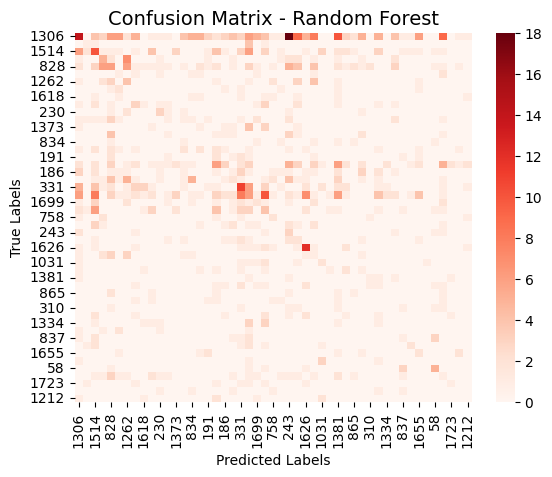

In [61]:
sns.heatmap(cm_df, cmap='Reds', annot=False, cbar=True)
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**LOCATION BASED ANALYSIS**

In [32]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [33]:
#  Check and clean latitude/longitude data
print(df[['Latitude', 'Longitude']].head())

# Drop rows with missing or invalid coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

print(f"Cleaned location data. Remaining records: {len(df)}")


     Latitude   Longitude
1   14.553708  121.014101
3   14.585318  121.056475
5   14.583764  121.056314
16  14.237679  121.056587
23 -15.777500  -47.882667
Cleaned location data. Remaining records: 6406


In [34]:
#  Visualize restaurant locations on an interactive map

# Get mean location to center map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]

m = folium.Map(location=map_center, zoom_start=5, tiles='cartodb positron')

# Add restaurant points (use small circle markers for performance)
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

print("Interactive map ready — scroll below to view it:")
m


Interactive map ready — scroll below to view it:


In [35]:
# Restaurant concentration using a heatmap

heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()

heat_map = folium.Map(location=map_center, zoom_start=5, tiles='cartodb positron')
HeatMap(heat_data, radius=8).add_to(heat_map)

print("Heatmap of restaurant density (zoom in to explore):")
heat_map


Heatmap of restaurant density (zoom in to explore):


In [36]:
# Group restaurants by city
if 'City' in df.columns:
    city_group = df.groupby('City').agg({
        'Restaurant Name': 'count',
        'Aggregate rating': 'mean',
        'Average Cost for two': 'mean'
    }).reset_index().rename(columns={'Restaurant Name': 'Restaurant Count'})
else:
    city_group = df.groupby('Locality').agg({
        'Restaurant Name': 'count',
        'Aggregate rating': 'mean',
        'Average Cost for two': 'mean'
    }).reset_index().rename(columns={'Restaurant Name': 'Restaurant Count'})

print("City/Locality-level summary created")
city_group.head(10)


City/Locality-level summary created


City  Restaurant Count  Aggregate rating  Average Cost for two
0     0                 9          4.411111            215.555556
1     1                10          3.990000           1325.000000
2     2                 6          4.333333            708.333333
3     3                 7          3.585714              5.714286
4     4                11          3.400000            486.363636
5     5                16          3.643750            553.125000
6     6                 4          4.225000             65.000000
7     7                 3          4.333333             30.000000
8     8                 8          4.537500             50.000000
9     9                 6          4.116667             24.166667

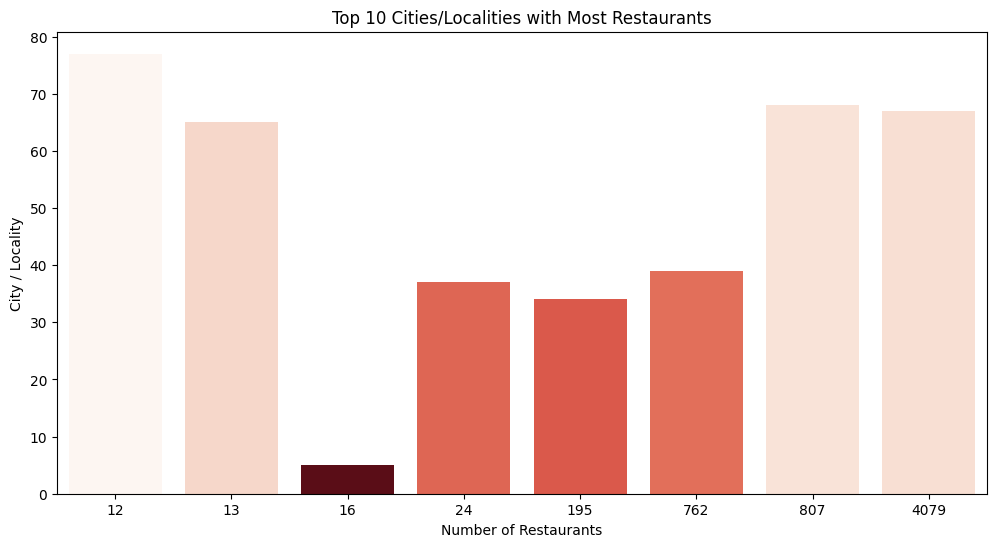

In [67]:
plt.figure(figsize=(12,6))
# Sort and select top 10
top_cities = city_group.sort_values('Restaurant Count', ascending=False).head(10)
# Dynamically set y-axis label (City or Locality)
y_label = 'City' if 'City' in city_group.columns else 'Locality'

# Plot with hue and legend suppression
sns.barplot(
    x='Restaurant Count',
    y=y_label,
    data=top_cities,
    hue=y_label,
    dodge=False,
    palette='Reds_r',
    legend=False )
plt.title('Top 10 Cities/Localities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City / Locality')
plt.show()


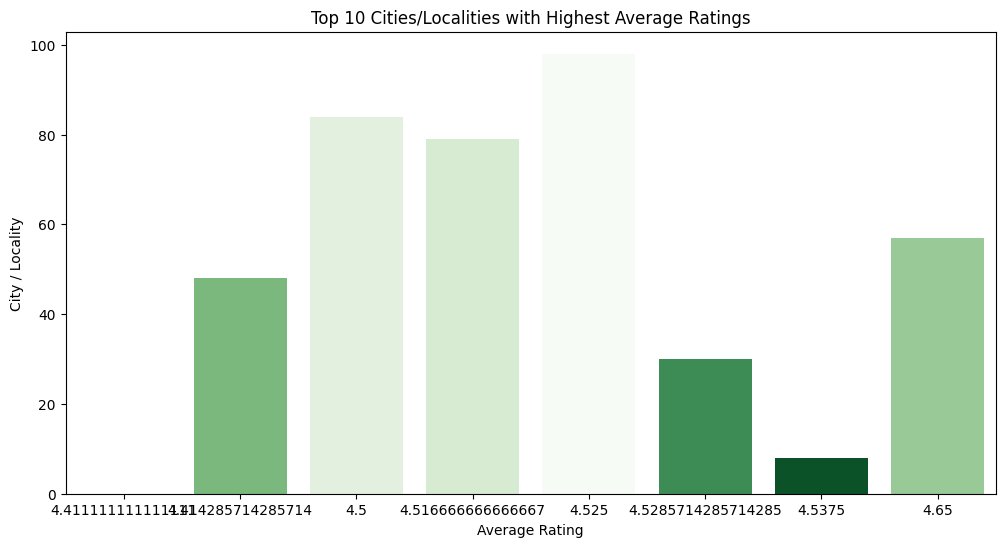

In [65]:
# Average rating per city
plt.figure(figsize=(12,6))
# Sort and take top 10 cities/localities
top_rating = city_group.sort_values('Aggregate rating', ascending=False).head(10)
# Define y-axis label dynamically
y_label = 'City' if 'City' in city_group.columns else 'Locality'

# Plot
sns.barplot(
    x='Aggregate rating',
    y=y_label,
    data=top_rating,
    hue=y_label,
    dodge=False,
    palette='Greens_r',
    legend=False
)

plt.title('Top 10 Cities/Localities with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('City / Locality')
plt.show()


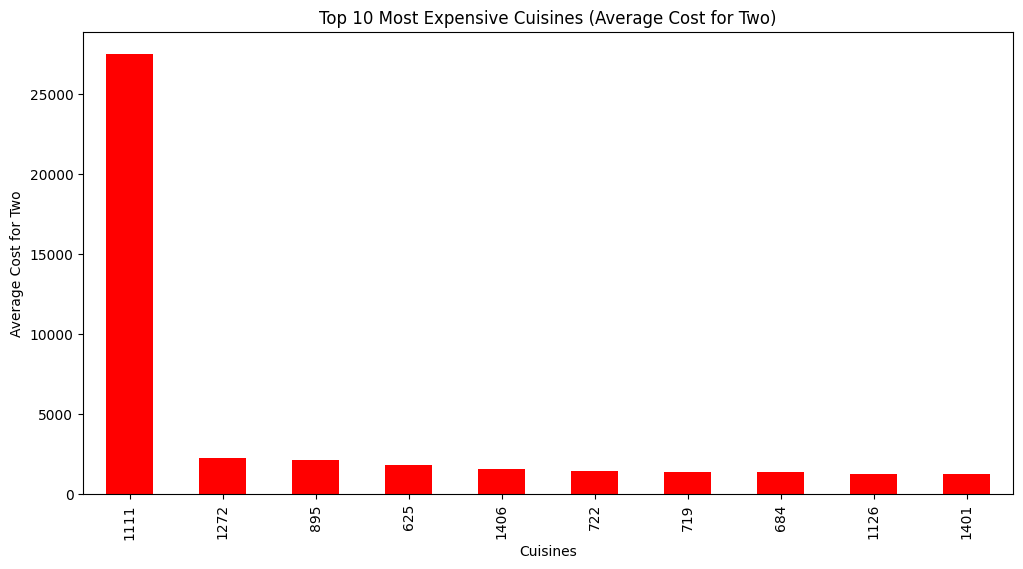

In [41]:
#  Analyze average price by cuisine or city
if 'Cuisines' in df.columns:
    cuisine_price = df.groupby('Cuisines')['Average Cost for two'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,6))
    cuisine_price.plot(kind='bar', color='red')
    plt.title('Top 10 Most Expensive Cuisines (Average Cost for Two)')
    plt.ylabel('Average Cost for Two')
    plt.show()

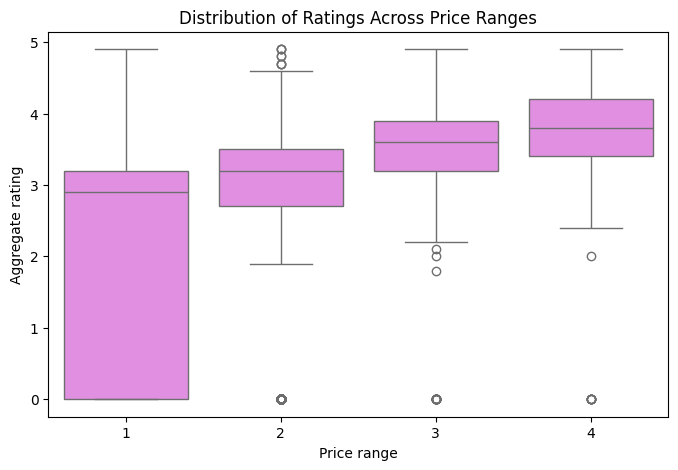

In [43]:
# Average rating by price range
plt.figure(figsize=(8,5))
sns.boxplot(x='Price range', y='Aggregate rating', data=df,color='violet')
plt.title('Distribution of Ratings Across Price Ranges')
plt.show()

In [46]:
# Insights Summary
print(" Key Insights from Location-Based Analysis:\n")

# Example insights — you can modify these based on your dataset
print(f"Total restaurants analyzed: {len(df)}")
if 'City' in df.columns:
    print(f"Cities covered: {df['City'].nunique()}")
print(f"Average global restaurant rating: {df['Aggregate rating'].mean():.2f}")
print(f"Price range median: {df['Price range'].median()}")

top_city = city_group.sort_values('Restaurant Count', ascending=False).iloc[0]
print(f"City/Locality with most restaurants: {top_city.iloc[0]} ({top_city['Restaurant Count']} restaurants)")
print(f"Highest average rated area: {city_group.sort_values('Aggregate rating', ascending=False).iloc[0].iloc[0]}")


 Key Insights from Location-Based Analysis:

Total restaurants analyzed: 6406
Cities covered: 99
Average global restaurant rating: 2.46
Price range median: 1.0
City/Locality with most restaurants: 67.0 (4079.0 restaurants)
Highest average rated area: 57.0
